In [1]:
import os
import csv
import datetime
import pandas as pd
import matplotlib.pyplot as plt

Read the CSV data file

In [2]:
data_dir = os.getcwd()
df = pd.read_csv(os.path.join(data_dir, 'ttu_table_without_dev.csv'),
                 header=0,
                 sep=';',
                 on_bad_lines='skip',
                 usecols=['system_name', 'from_package_name', 'year_', 'valid_ttu_in_days'],
                 )
df.columns = ['SystemName', 'FromPackageName', 'Year', 'TTUInDays']
df

,SystemName,FromPackageName,Year,TTUInDays
0,NPM,-blanc-server-project,2021,-101
1,NPM,-blanc-server-project,2021,0
2,NPM,-blanc-server-project,2021,41
3,NPM,-cascade-all,2023,-8
4,NPM,-cascade-all,2023,-14
...,...,...,...,...
21961032,PYPI,zzx-deep-genome,2021,-15
21961033,PYPI,zzx-deep-genome,2021,-630
21961034,PYPI,zzx-deep-genome,2021,-4
21961035,PYPI,zzx-deep-genome,2021,-13


In [3]:
df.groupby

<bound method DataFrame.groupby of          SystemName        FromPackageName  Year  TTUInDays
0               NPM  -blanc-server-project  2021       -101
1               NPM  -blanc-server-project  2021          0
2               NPM  -blanc-server-project  2021         41
3               NPM           -cascade-all  2023         -8
4               NPM           -cascade-all  2023        -14
...             ...                    ...   ...        ...
21961032       PYPI        zzx-deep-genome  2021        -15
21961033       PYPI        zzx-deep-genome  2021       -630
21961034       PYPI        zzx-deep-genome  2021         -4
21961035       PYPI        zzx-deep-genome  2021        -13
21961036       PYPI           zzzeeksphinx  2021        -40

[21961037 rows x 4 columns]>

Change negative TTU values to zero

In [4]:
df.loc[df["TTUInDays"] < 0, "TTUInDays"] = 0
df

,SystemName,FromPackageName,Year,TTUInDays
0,NPM,-blanc-server-project,2021,0
1,NPM,-blanc-server-project,2021,0
2,NPM,-blanc-server-project,2021,41
3,NPM,-cascade-all,2023,0
4,NPM,-cascade-all,2023,0
...,...,...,...,...
21961032,PYPI,zzx-deep-genome,2021,0
21961033,PYPI,zzx-deep-genome,2021,0
21961034,PYPI,zzx-deep-genome,2021,0
21961035,PYPI,zzx-deep-genome,2021,0


Calculate cumulative percentage the way sonatype did in 2019 (using ttu data points for all packages together).

In [5]:
# Split DataFrame by SystemName
df_npm = df[df['SystemName'] == "NPM"]
df_pypi = df[df['SystemName'] == "PYPI"]

In [6]:

df_npm

,SystemName,FromPackageName,Year,TTUInDays
0,NPM,-blanc-server-project,2021,0
1,NPM,-blanc-server-project,2021,0
2,NPM,-blanc-server-project,2021,41
3,NPM,-cascade-all,2023,0
4,NPM,-cascade-all,2023,0
...,...,...,...,...
20101598,NPM,zzzzhy,2018,0
20101599,NPM,zzzzhy,2018,0
20101600,NPM,zzzzhy,2018,0
20101601,NPM,zzzzzzzzzzzzzzzzz,2020,0


In [7]:
df_npm.sort_values(by=['TTUInDays'], inplace=True)
# Create a cumulative percentage column
df_npm['cumsum'] = df_npm['TTUInDays'].cumsum()
df_npm['cumulative_percentage'] = df_npm['TTUInDays'].cumsum() / df_npm['TTUInDays'].sum() * 100

df_npm


/var/folders/gq/329v3h5j3lv50j_25gdv3d8m0000gq/T/ipykernel_9922/4186466867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_npm.sort_values(by=['TTUInDays'], inplace=True)
/var/folders/gq/329v3h5j3lv50j_25gdv3d8m0000gq/T/ipykernel_9922/4186466867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_npm['cumsum'] = df_npm['TTUInDays'].cumsum()
/var/folders/gq/329v3h5j3lv50j_25gdv3d8m0000gq/T/ipykernel_9922/4186466867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,SystemName,FromPackageName,Year,TTUInDays,cumsum,cumulative_percentage
0,NPM,-blanc-server-project,2021,0,0,0.000000
12844528,NPM,@workday/canvas-kit-css,2022,0,0,0.000000
12844527,NPM,@workday/canvas-kit-css,2022,0,0,0.000000
12844526,NPM,@workday/canvas-kit-css,2022,0,0,0.000000
12844525,NPM,@workday/canvas-kit-css,2022,0,0,0.000000
...,...,...,...,...,...,...
17687600,NPM,pomelo-ansser,2023,4000,273867218,99.994066
14657203,NPM,darkside,2022,4025,273871243,99.995536
17687599,NPM,pomelo-ansser,2023,4038,273875281,99.997010
3671264,NPM,@david-cli-dev/init,2023,4040,273879321,99.998485


In [8]:
df_npm['TTUInDays'].nunique()

3045

In [9]:
bins = df_npm['TTUInDays'].unique()
bins.sort()
bins

array([   0,    1,    2, ..., 4038, 4040, 4148])

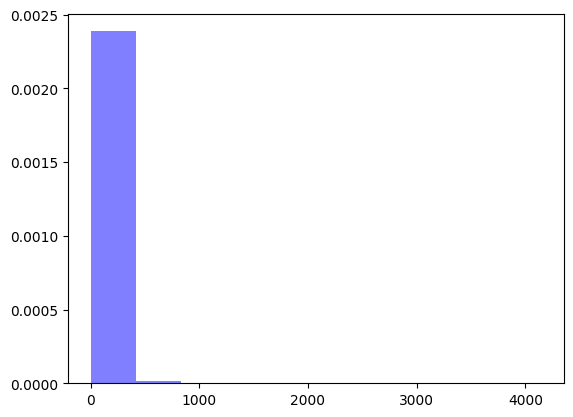

In [10]:
plt.hist(df_npm['TTUInDays'],
         df_npm['TTUInDays'].unique().sort(),
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [11]:
df_npm['TTUInDays'].value_counts()

TTUInDays
0       18050231
1         128091
2          92093
3          82657
6          74136
          ...   
2871           1
2869           1
2494           1
2202           1
4148           1
Name: count, Length: 3045, dtype: int64

In [12]:
df_npm['TTUInDays'].value_counts().shape

(3045,)

In [13]:
value_counts = df_npm['TTUInDays'].value_counts(normalize=True)
value_counts


TTUInDays
0       8.979498e-01
1       6.372178e-03
2       4.581376e-03
3       4.111961e-03
6       3.688064e-03
            ...     
2871    4.974728e-08
2869    4.974728e-08
2494    4.974728e-08
2202    4.974728e-08
4148    4.974728e-08
Name: proportion, Length: 3045, dtype: float64

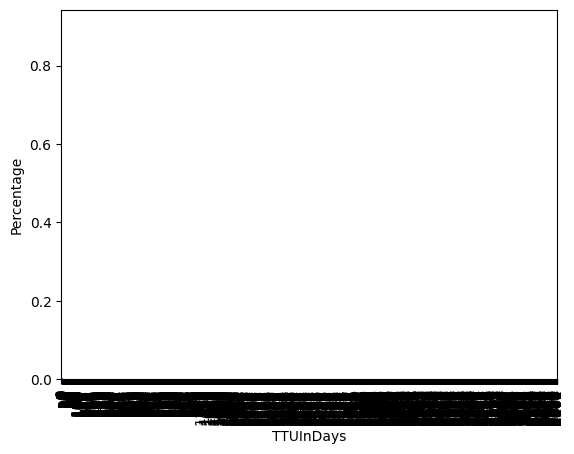

In [14]:
value_counts.plot(kind='bar')
plt.ylabel('Percentage')
plt.show()

In [15]:
df_pypi

,SystemName,FromPackageName,Year,TTUInDays
20101603,PYPI,0lever-so,2019,0
20101604,PYPI,0lever-so,2019,0
20101605,PYPI,0lever-utils,2019,0
20101606,PYPI,0lever-utils,2019,0
20101607,PYPI,0lever-utils,2019,0
...,...,...,...,...
21961032,PYPI,zzx-deep-genome,2021,0
21961033,PYPI,zzx-deep-genome,2021,0
21961034,PYPI,zzx-deep-genome,2021,0
21961035,PYPI,zzx-deep-genome,2021,0


In [16]:
df_pypi['TTUInDays'].value_counts()

TTUInDays
0       1690432
1          4944
7          4091
2          3720
3          3720
         ...   
1591          1
1317          1
3125          1
1480          1
2089          1
Name: count, Length: 2111, dtype: int64